# Table of Contents
1. [📊 Understand the Data](#understand-the-data)
2. [🧹 Data Cleaning](#data-cleaning)
   1. [Best practice](#best-practice)
3. [🔍 Analysis](#analysis)
   1. [Distribution of Target Classes](#31)
   2. [No. of Words in Text by Category](#32)
   3. [Average Word Length in Text by Category](#33)
   4. [Word Cloud](#34)
4. [📈 Conclusion](#conclusion)


<a id="understand-the-data"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Chapter One</span>
            <span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Understand the Data 📊
            </span>
        </b>
    </h1>
    <br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


In [1]:
import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from tabulate import tabulate
from wordcloud import WordCloud
#import networkx as nx

import plotly.express as px  
import plotly.graph_objects as go  
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')


In [2]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\BBC\bbc_text_cls.csv'
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(2)

,text,labels
2151,Britons fed up with net service\n\nA survey co...,tech
202,'Standoff' on Deutsche's LSE bid\n\nDeutsche B...,business


In [3]:
print("The size of the DataFrame:",df.size, '\n')
print('The Shape of the DataFrame', df.shape, '\n')
print("Available columns in the DataFrame:", df.columns)

# Calculate memory usage of the DataFrame
memory_size = df.memory_usage(deep=True).sum()
memory_size_mb = memory_size / (1024 ** 2)
print(f"\nEstimated memory size: {memory_size_mb:.2f} MB")


The size of the DataFrame: 4450 

The Shape of the DataFrame (2225, 2) 

Available columns in the DataFrame: Index(['text', 'labels'], dtype='object')

Estimated memory size: 5.04 MB


In [4]:
# Get info summary
info = {
    "Index": df.index,
    "Columns": df.columns.tolist(),
    "Non-Null Count": df.notnull().sum().tolist(),
    "Dtype": df.dtypes.tolist()
}

# Convert to a format suitable for tabulation
info_table = zip(info["Columns"], info["Non-Null Count"], info["Dtype"])

# Print the summary information in a table format
print(tabulate(info_table, headers=["Column", "Non-Null Count", "Dtype"], tablefmt="rounded_grid"))

╭──────────┬──────────────────┬─────────╮
│ Column   │   Non-Null Count │ Dtype   │
├──────────┼──────────────────┼─────────┤
│ text     │             2225 │ object  │
├──────────┼──────────────────┼─────────┤
│ labels   │             2225 │ object  │
╰──────────┴──────────────────┴─────────╯


In [5]:
df.describe(include='all').T

,count,unique,top,freq
text,2225,2127,Ray DVD beats box office takings\n\nOscar-nomi...,2
labels,2225,5,sport,511



<a id="data-cleaning"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Chapter Two</span>
            <span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Data Cleaning 🧹
            </span>
        </b>
    </h1>
    <br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


In [6]:
df.duplicated().sum()

98

In [7]:
df.isnull().sum()

text      0
labels    0
dtype: int64

<Axes: >

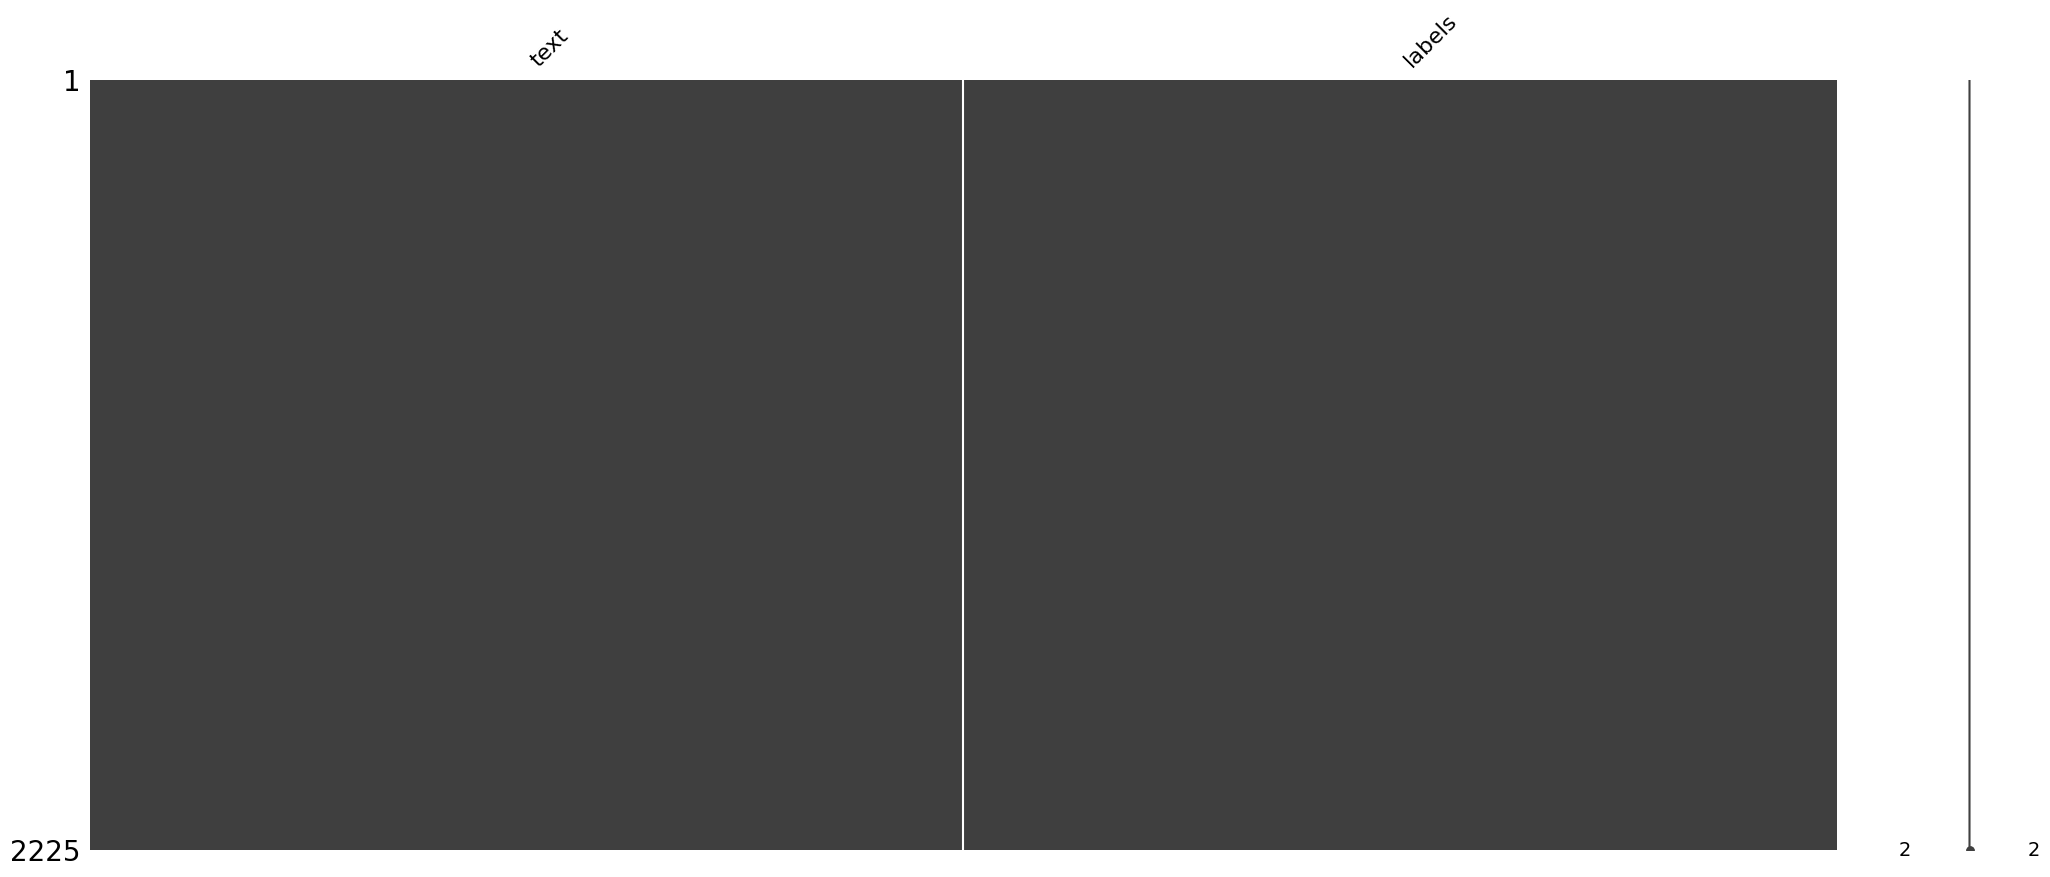

In [8]:
msno.matrix(df)

<a id="best-practice"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
<p style="color: Black;">
   ⭐ <b>Best Practice before clean the data have a copy of Original Data<b>
   <pre  style="color: Black; font-size: 20px;">
   </pre>
</p>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>

In [10]:
dfc = df.copy()

<a id="analysis"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Chapter Three</span>
            <span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Analysis 🔍
            </span>
        </b>
    </h1>
    <br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


<a id="31"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 1. Distribution of Target Classes </b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [13]:
df['labels'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [22]:
fig = px.histogram(
    dfc,
    x=dfc['labels'],
    text_auto=True,
)

fig.update_layout(
    title='Distribution of Target Classes',
       
)
fig.show()

<a id="32"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 2. No. of Words in Text by Category</b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [42]:
# Calculate the number of words in each text
dfc['word_count'] = dfc['text'].str.split().map(len)

fig = px.histogram(
    dfc, 
    x='word_count', 
    color='labels',
    facet_col='labels',
    title='No. of Words in Text by Category',
    labels={'word_count': 'No. of Words'}, 
    marginal='box', 
    #nbins=50  
    
)

fig.update_layout(
    xaxis_title='No. of Words',
    yaxis_title='Count',
    title_font_size=25
)

fig.show()


<a id="33"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 3.Average Word Length in Text by Category </b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [40]:
# Calculate the average word length for each text
df['avg_word_length'] = df['text'].str.split().apply(lambda x: np.mean([len(word) for word in x]))

fig = px.histogram(
    df, 
    x='avg_word_length', 
    color='labels',
    facet_col='labels',
    title='Average Word Length in Text by Category',
    labels={'avg_word_length': 'Average Word Length'}, 
    marginal='box', 
    nbins=20       
)

fig.update_layout(
    xaxis_title='Average Word Length',
    yaxis_title='Count',
    title_font_size=25
)


fig.show()

<a id="34"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡4. WordCloud </b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


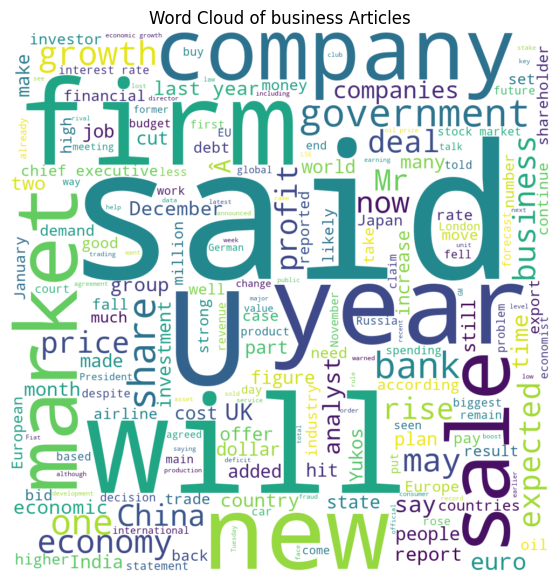

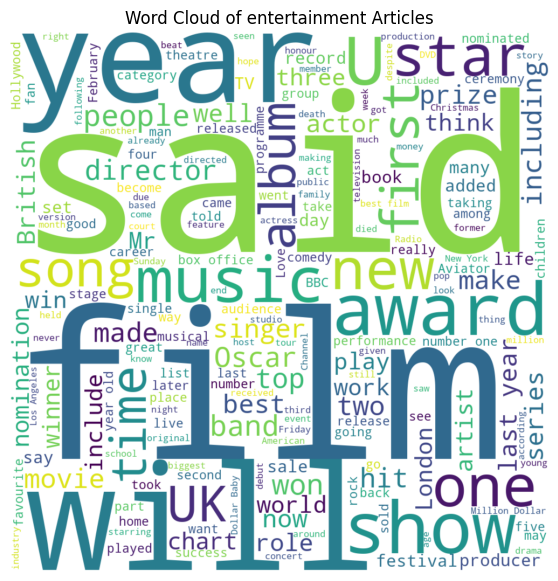

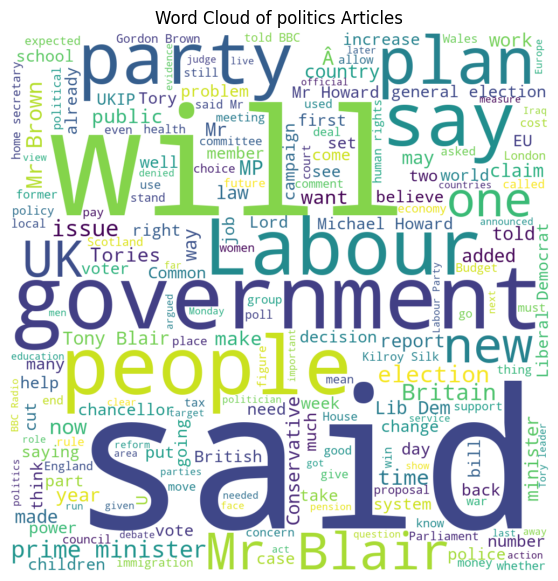

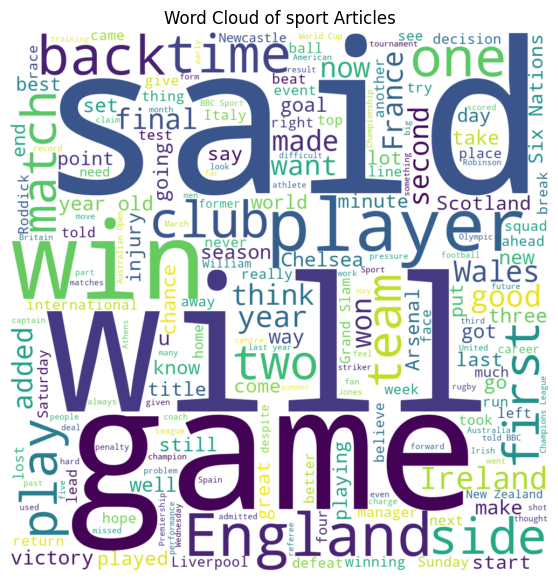

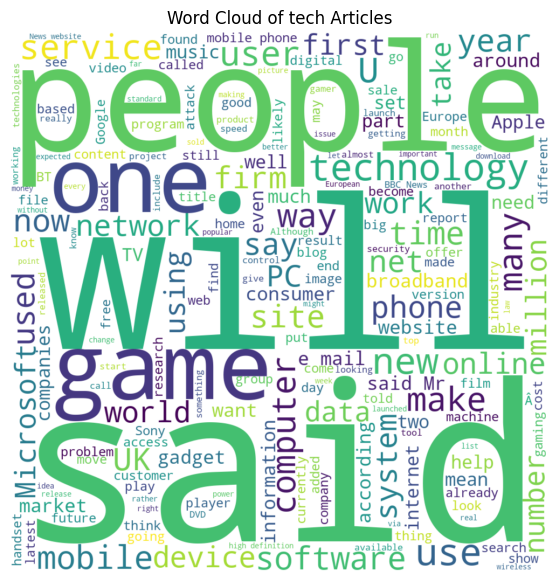

In [45]:

# Get unique labels
labels = dfc['labels'].unique()

# Loop through each label and generate a word cloud
for label in labels:
    # Filter the DataFrame for the current label
    label_text = ' '.join(dfc[dfc['labels'] == label]['text'].astype(str))
    
    # Generate the word cloud
    wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(label_text)
    
    # Display the word cloud
    plt.figure(figsize=(18, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title(f"Word Cloud of {label} Articles")
    plt.show()

<a id="conclusion"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Last but not least, the final chapter</span>
            <br><span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Draw an Conclusion 📝
            </span>
        </b>
    </h1>
<br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
<div class="alert alert-block alert-info" >
<b>🌟 Insights : </b> Now you can do further analysis.

[Inspiration](https://www.kaggle.com/code/dnkumars/lstm-model-bbc-articles-dataset)
</div>